[View in Colaboratory](https://colab.research.google.com/github/fabiansd/AI-workshop/blob/master/House_price_prediction_showcase.ipynb)

In [98]:
## Import av biblioteker og settings
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#############################################################################


## Laster ned datasettet fra lenken og lagrer dette som filen Melbourne_train.csv
from six.moves import urllib
urllib.request.urlretrieve("https://raw.githubusercontent.com/fabiansd/AI-workshop/master/data/Melbourne_train.csv", "./Melbourne_train.csv")
data = pd.read_csv('Melbourne_train.csv')

# Velger kolonnene man ønsker i det nye datasettet
aktuelle_kolonner = ['Id','LotArea','Neighborhood','WoodDeckSF','Condition1','HouseStyle','LandContour','OverallQual','OverallCond','YearBuilt','YearRemodAdd','Heating','1stFlrSF','FullBath','HalfBath','BedroomAbvGr','Fence','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','Fireplaces','PoolArea','PoolQC','MoSold','YrSold']
data_modell = data[aktuelle_kolonner]

# Eksempel på generering av ny kolonne
data_modell['HouseAge'] = data['YrSold'] - data['YearBuilt']

#Fence NaN endret til None
data_modell['Fence'] = data_modell['Fence'].fillna('None')

#Salgspris legges til på slutten
data_modell['SalePrice'] = data['SalePrice']

#Ekstrempunkter mht kvadratfot fjernet
data_modell = data_modell[data['LotArea'] < 100000]

#Skriver ut de 5 første radene
data_modell.head(15)

,Id,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Heating,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,Fence,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,Fireplaces,PoolArea,PoolQC,MoSold,YrSold,HouseAge,SalePrice
0,1,8450,CollgCr,0,Norm,2Story,Lvl,7,5,2003,2003,GasA,856,2,1,3,None,1,8,2,548,0,0,NaN,2,2008,5,208500
1,2,9600,Veenker,298,Feedr,1Story,Lvl,6,8,1976,1976,GasA,1262,2,0,3,None,1,6,2,460,1,0,NaN,5,2007,31,181500
2,3,11250,CollgCr,0,Norm,2Story,Lvl,7,5,2001,2002,GasA,920,2,1,3,None,1,6,2,608,1,0,NaN,9,2008,7,223500
3,4,9550,Crawfor,0,Norm,2Story,Lvl,7,5,1915,1970,GasA,961,1,0,3,None,1,7,3,642,1,0,NaN,2,2006,91,140000
4,5,14260,NoRidge,192,Norm,2Story,Lvl,8,5,2000,2000,GasA,1145,2,1,4,None,1,9,3,836,1,0,NaN,12,2008,8,250000
5,6,14115,Mitchel,40,Norm,1.5Fin,Lvl,5,5,1993,1995,GasA,796,1,1,1,MnPrv,1,5,2,480,0,0,NaN,10,2009,16,143000
6,7,10084,Somerst,255,Norm,1Story,Lvl,8,5,2004,2005,GasA,1694,2,0,3,None,1,7,2,636,1,0,NaN,8,2007,3,307000
7,8,10382,NWAmes,235,PosN,2Story,Lvl,7,6,1973,1973,GasA,1107,2,1,3,None,1,7,2,484,2,0,NaN,11,2009,36,200000
8,9,6120,OldTown,90,Artery,1.5Fin,Lvl,7,5,1931,1950,GasA,1022,2,0,2,None,2,8,2,468,2,0,NaN,4,2008,77,129900
9,10,7420,BrkSide,0,Artery,1.5Unf,Lvl,5,6,1939,1950,GasA,1077,1,0,2,None,2,5,1,205,2,0,NaN,1,2008,69,118000


In [99]:
data_modell.describe()

,Id,LotArea,WoodDeckSF,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,Fireplaces,PoolArea,MoSold,YrSold,HouseAge,SalePrice
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,731.403159,10096.507555,93.782280,6.098901,5.574863,1971.285714,1984.866758,1161.065934,1.563874,0.383929,2.866071,1.046703,6.517170,1.766484,472.789148,0.609203,2.766484,6.321429,2007.815934,36.530220,180605.766484
std,421.731680,5648.811979,124.324683,1.384191,1.113442,30.241492,20.648326,385.792776,0.551200,0.503175,0.816027,0.220627,1.626577,0.748242,213.965890,0.641431,40.232235,2.706943,1.329204,30.288835,79274.640742
min,1.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,34900.000000
25%,367.750000,7538.750000,0.000000,5.000000,5.000000,1954.000000,1967.000000,882.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,329.500000,0.000000,0.000000,5.000000,2007.000000,7.750000,129900.000000
50%,732.500000,9468.500000,0.000000,6.000000,5.000000,1973.000000,1994.000000,1086.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,479.500000,1.000000,0.000000,6.000000,2008.000000,35.000000,162950.000000
75%,1096.250000,11588.000000,168.000000,7.000000,6.000000,2000.250000,2004.000000,1389.250000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,576.000000,1.000000,0.000000,8.000000,2009.000000,54.000000,213500.000000
max,1460.000000,70761.000000,857.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,3.000000,738.000000,12.000000,2010.000000,136.000000,755000.000000


#NaN

In [2]:
data_modell[['PoolArea','PoolQC']].head()

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [3]:
data_modell[['PoolArea','PoolQC']][data_modell['PoolArea'] > 0].head()

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd


In [4]:
data_modell['PoolQC'] = data_modell['PoolQC'].fillna(value='None')
data_modell[['PoolArea','PoolQC']].head()

,PoolArea,PoolQC
0,0,None
1,0,None
2,0,None
3,0,None
4,0,None


In [97]:
data_modell.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      49
Low      33
Name: LandContour, dtype: int64

#Unyttige attributter

In [30]:
data.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

#Algoritmer foretrekker tall

In [100]:
from sklearn import preprocessing

## Oppretter encodere for de ulike kategoriene vi ønsker å transformere fra tekst til tall.
Neighborhood_enc = preprocessing.LabelEncoder()
Condition1_enc = preprocessing.LabelEncoder()
HouseStyle_enc = preprocessing.LabelEncoder()
Fence_enc = preprocessing.LabelEncoder()
PoolQualityCondition_enc = preprocessing.LabelEncoder()
LandContour_enc = preprocessing.LabelEncoder()
Heating_enc = preprocessing.LabelEncoder()

## Konverterer kolonnene som inneholder tekstverdier til tallverdier
data_modell['Neighborhood'] = Neighborhood_enc.fit_transform(data_modell['Neighborhood'])
data_modell['Condition1'] = Condition1_enc.fit_transform(data_modell['Condition1'])
data_modell['HouseStyle'] = HouseStyle_enc.fit_transform(data_modell['HouseStyle'])
data_modell['Fence'] = Fence_enc.fit_transform(data_modell['Fence'])
data_modell['PoolQC'] = PoolQualityCondition_enc.fit_transform(data_modell['PoolQC'])
data_modell['LandContour'] = LandContour_enc.fit_transform(data_modell['LandContour'])
data_modell['Heating'] = Heating_enc.fit_transform(data_modell['Heating'])

#Skriver ut de 5 første radene
data_modell.head(10)

,Id,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Heating,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,Fence,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,Fireplaces,PoolArea,PoolQC,MoSold,YrSold,HouseAge,SalePrice
0,1,8450,5,0,2,5,3,7,5,2003,2003,1,856,2,1,3,4,1,8,2,548,0,0,0,2,2008,5,208500
1,2,9600,24,298,1,2,3,6,8,1976,1976,1,1262,2,0,3,4,1,6,2,460,1,0,970,5,2007,31,181500
2,3,11250,5,0,2,5,3,7,5,2001,2002,1,920,2,1,3,4,1,6,2,608,1,0,969,9,2008,7,223500
3,4,9550,6,0,2,5,3,7,5,1915,1970,1,961,1,0,3,4,1,7,3,642,1,0,968,2,2006,91,140000
4,5,14260,15,192,2,5,3,8,5,2000,2000,1,1145,2,1,4,4,1,9,3,836,1,0,967,12,2008,8,250000
5,6,14115,11,40,2,0,3,5,5,1993,1995,1,796,1,1,1,2,1,5,2,480,0,0,966,10,2009,16,143000
6,7,10084,21,255,2,2,3,8,5,2004,2005,1,1694,2,0,3,4,1,7,2,636,1,0,965,8,2007,3,307000
7,8,10382,14,235,4,5,3,7,6,1973,1973,1,1107,2,1,3,4,1,7,2,484,2,0,964,11,2009,36,200000
8,9,6120,17,90,0,0,3,7,5,1931,1950,1,1022,2,0,2,4,2,8,2,468,2,0,963,4,2008,77,129900
9,10,7420,3,0,0,1,3,5,6,1939,1950,1,1077,1,0,2,4,2,5,1,205,2,0,962,1,2008,69,118000


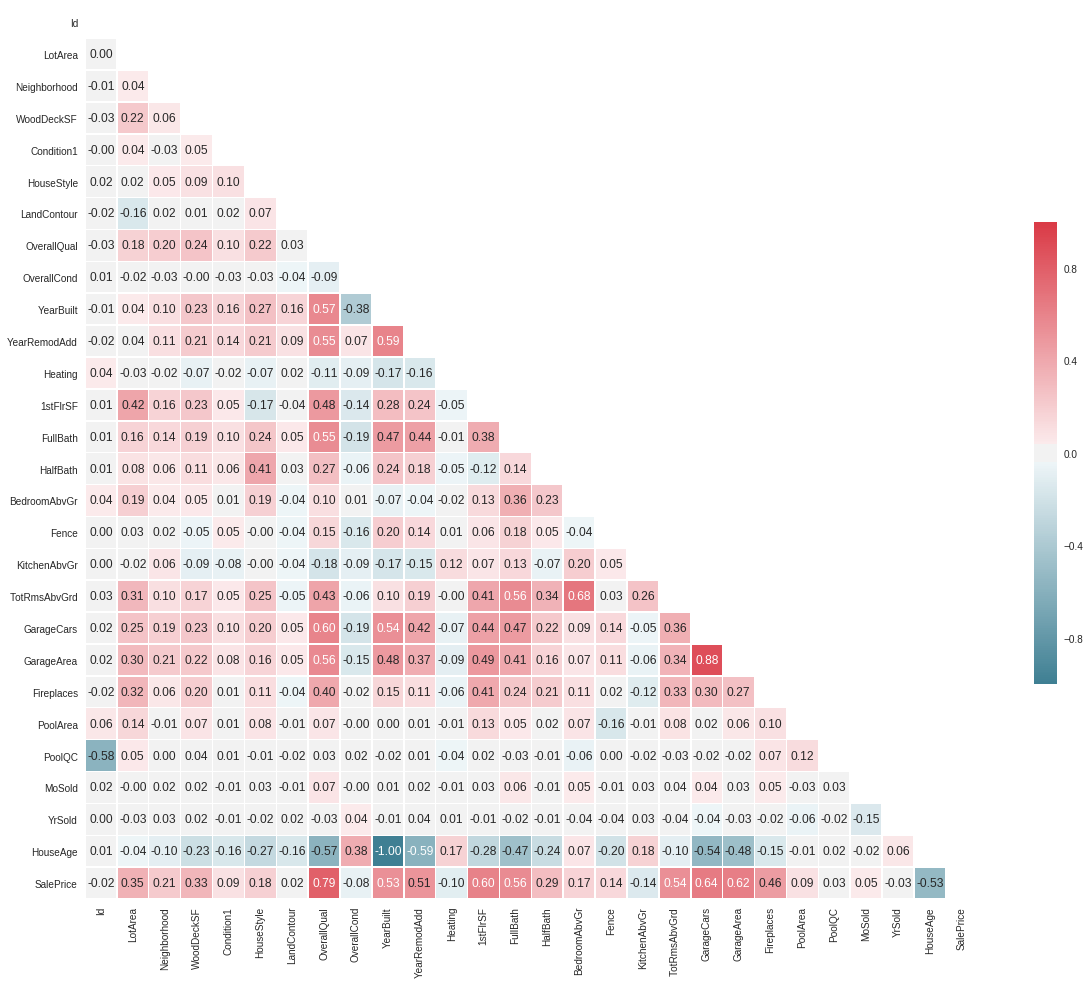

In [101]:
sns.set(style="white")


# Compute the correlation matrix
corr = data_modell.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 17))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot = True,fmt = ".2f", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [104]:

# Vi dropper unyttige attributter
data_modell_desilled = data_modell.drop(['Id','OverallCond','Condition1','HouseStyle','LandContour','OverallCond','Heating','HouseAge','Fence','KitchenAbvGr','PoolArea','PoolQC','MoSold','YrSold'], axis=1)


## Sjekker at kolonnene med kategoriske features har fått tallverdier
data_modell_desilled.head(5)

,LotArea,Neighborhood,WoodDeckSF,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,Fireplaces,SalePrice
0,8450,5,0,7,2003,2003,856,2,1,3,8,2,548,0,208500
1,9600,24,298,6,1976,1976,1262,2,0,3,6,2,460,1,181500
2,11250,5,0,7,2001,2002,920,2,1,3,6,2,608,1,223500
3,9550,6,0,7,1915,1970,961,1,0,3,7,3,642,1,140000
4,14260,15,192,8,2000,2000,1145,2,1,4,9,3,836,1,250000


In [105]:
data_modell_desilled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 15 columns):
LotArea         1456 non-null int64
Neighborhood    1456 non-null int64
WoodDeckSF      1456 non-null int64
OverallQual     1456 non-null int64
YearBuilt       1456 non-null int64
YearRemodAdd    1456 non-null int64
1stFlrSF        1456 non-null int64
FullBath        1456 non-null int64
HalfBath        1456 non-null int64
BedroomAbvGr    1456 non-null int64
TotRmsAbvGrd    1456 non-null int64
GarageCars      1456 non-null int64
GarageArea      1456 non-null int64
Fireplaces      1456 non-null int64
SalePrice       1456 non-null int64
dtypes: int64(15)
memory usage: 182.0 KB


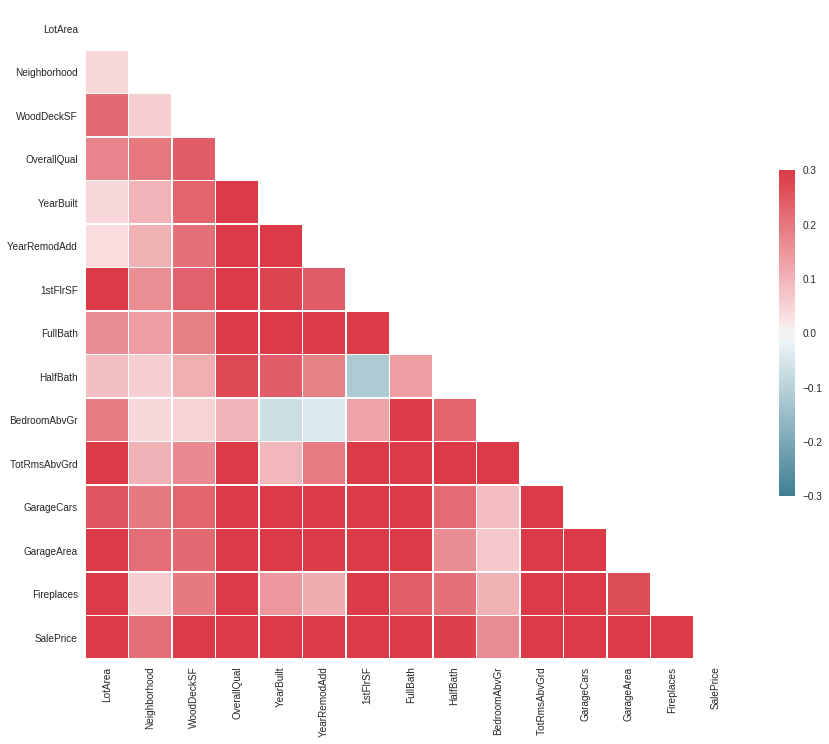

In [106]:
sns.set(style="white")


# Compute the correlation matrix
corr = data_modell_desilled.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [107]:
data_modell_desilled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 15 columns):
LotArea         1456 non-null int64
Neighborhood    1456 non-null int64
WoodDeckSF      1456 non-null int64
OverallQual     1456 non-null int64
YearBuilt       1456 non-null int64
YearRemodAdd    1456 non-null int64
1stFlrSF        1456 non-null int64
FullBath        1456 non-null int64
HalfBath        1456 non-null int64
BedroomAbvGr    1456 non-null int64
TotRmsAbvGrd    1456 non-null int64
GarageCars      1456 non-null int64
GarageArea      1456 non-null int64
Fireplaces      1456 non-null int64
SalePrice       1456 non-null int64
dtypes: int64(15)
memory usage: 182.0 KB


#Regresjonsmodeller

##Oppdeling av data

In [108]:
from sklearn.model_selection import train_test_split

#Velg alle kolonner untatt den siste. Denne inneholder Salgsprisen som vi ønsker å predikere
input_data = data_modell_desilled.iloc[:,0:-1].copy(deep=True)

#Velg kun siste kolonne. Dette er salgsprisen
output_data = data_modell_desilled['SalePrice'].copy(deep=True)

#Dataen deles opp i to sett: treningssett og testsett og lagres i de 4 nye objektene. Test_size bestemmer andelen av dataen som blir brukt til testing av modellen
input_treningsdata, input_testdata, output_treningsdata, output_testdata = train_test_split(input_data, output_data, test_size=0.2, random_state=1)

print('Input_treningsdata: {}, input_testdata: {}, output_treningsdata: {} og output_testdata: {}'.format(input_treningsdata.shape, input_testdata.shape, output_treningsdata.shape, output_testdata.shape))

## Importerer metode for å måle gjennomsnittlig absolutt feil
from sklearn.metrics import mean_absolute_error

Input_treningsdata: (1164, 14), input_testdata: (292, 14), output_treningsdata: (1164,) og output_testdata: (292,)


## Lineær regresjon

In [109]:
#Treningsfase
from sklearn.linear_model import LinearRegression

#Regressjons-objekt fra scikit-learn
modell = LinearRegression()

#Tilpass regressjonskoeffesienter med treningsdata
modell.fit(input_treningsdata, output_treningsdata)

#Testfase

#Gjør pris-prediksjon på testdataen. 
pris_prediksjone_linr = modell.predict(input_testdata)

#Beregn feil
MAE_lin = mean_absolute_error(pris_prediksjone_linr, output_testdata)

#Feilen skrives ut
print("MAE: {}".format(MAE_lin))

MAE: 25651.2306684


## Lineær "Support Vector Regression" (SVR)

In [110]:
#Treningsfase
from sklearn.svm import SVR

#Regressjons-objekt fra scikit-learn
modell = SVR(kernel='linear')

#Tilpass regressjonskoeffesienter med treningsdata
modell.fit(input_treningsdata, output_treningsdata)

#Testfase

#Gjør pris-prediksjon på testdataen. 
pris_prediksjoner_SVR = modell.predict(input_testdata)

#Beregn feil
MAE_SVR = mean_absolute_error(pris_prediksjoner_SVR, output_testdata)

#Feilen skrives ut
print("MAE: {}".format(MAE_SVR))

MAE: 32833.0492335


## Lasso regresjon

In [111]:
#Treningsfase
from sklearn.linear_model import Lasso


#Regressjons-objekt fra scikit-learn
modell = Lasso(alpha = 0.1, max_iter=2000)

#Tilpass regressjonskoeffesienter med treningsdata
modell.fit(input_treningsdata, output_treningsdata)

#Testfase

#Gjør pris-prediksjon på testdataen. 
pris_prediksjoner_Lasso = modell.predict(input_testdata)

#Beregn feil
MAE_Lasso = mean_absolute_error(pris_prediksjoner_Lasso, output_testdata)

#Feilen skrives ut
print("MAE: {}".format(MAE_Lasso))

MAE: 25651.1190553


##Ensemble regresjon

In [112]:
#Treningsfase
from sklearn.ensemble import GradientBoostingRegressor


#Regressjons-objekt fra scikit-learn
modell = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, random_state=1)

#Tilpass regressjonskoeffesienter med treningsdata
modell.fit(input_treningsdata, output_treningsdata)

#Testfase

#Gjør pris-prediksjon på testdataen. 
pris_prediksjoner_Ensemble = modell.predict(input_testdata)

#Beregn feil
MAE_Ensamble = mean_absolute_error(pris_prediksjoner_Ensemble, output_testdata)

#Feilen skrives ut
print("MAE: {}".format(MAE_Ensamble))

MAE: 21299.080096


##Visualisering av resultater

Text(0.5,1,u'Ensemble regressjon, MAE: 21299.080096')

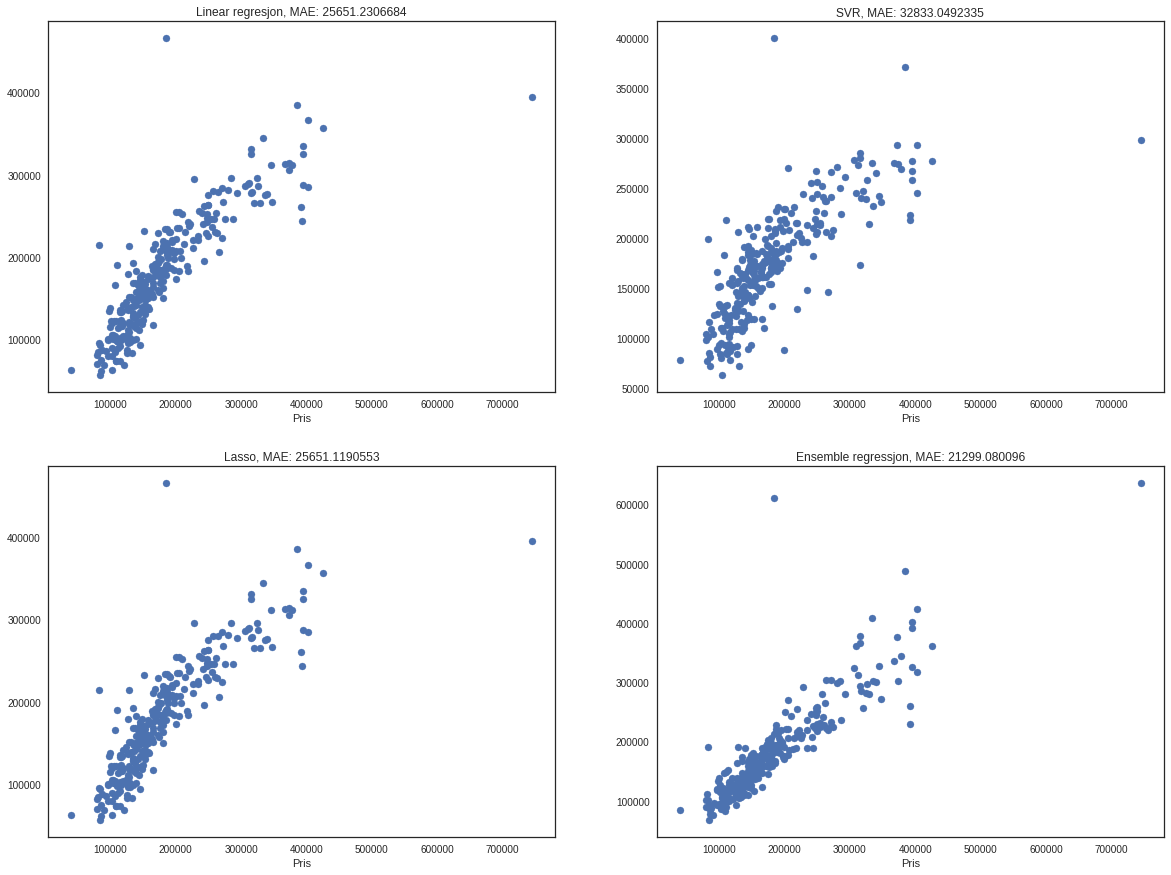

In [113]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
plt.scatter(output_testdata, pris_prediksjone_linr)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Linear regresjon, MAE: {}'.format(MAE_lin))

plt.subplot(2,2,2)
plt.scatter(output_testdata, pris_prediksjoner_SVR)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('SVR, MAE: {}'.format(MAE_SVR))

plt.subplot(2,2,3)
plt.scatter(output_testdata, pris_prediksjoner_Lasso)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Lasso, MAE: {}'.format(MAE_Lasso))

plt.subplot(2,2,4)
plt.scatter(output_testdata, pris_prediksjoner_Ensemble)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Ensemble regressjon, MAE: {}'.format(MAE_Ensamble))


##Hva om vi kjører det fulle datasettet?

In [114]:
#Velg alle kolonner untatt den siste. Denne inneholder Salgsprisen som vi ønsker å predikere
input_data = data_modell.iloc[:,0:-1].copy(deep=True)

#Velg kun siste kolonne. Dette er salgsprisen
output_data = data_modell['SalePrice'].copy(deep=True)

#Dataen deles opp i to sett: treningssett og testsett og lagres i de 4 nye objektene. Test_size bestemmer andelen av dataen som blir brukt til testing av modellen
input_treningsdata, input_testdata, output_treningsdata, output_testdata = train_test_split(input_data, output_data, test_size=0.2, random_state=1)


#Treningsfase
from sklearn.linear_model import LinearRegression

#Regressjons-objekt fra scikit-learn
modell = LinearRegression()

#Tilpass regressjonskoeffesienter med treningsdata
modell.fit(input_treningsdata, output_treningsdata)

#Testfase

#Gjør pris-prediksjon på testdataen. 
pris_prediksjone_linr_full = modell.predict(input_testdata)

#Beregn feil
MAE_lin_full = mean_absolute_error(pris_prediksjone_linr_full, output_testdata)

#Feilen skrives ut
print("MAE: {}".format(MAE_lin_full))

MAE: 25825.0465779


Text(0.5,1,u'Linear regresjon med 28 attributter, MAE: 25825.0465779')

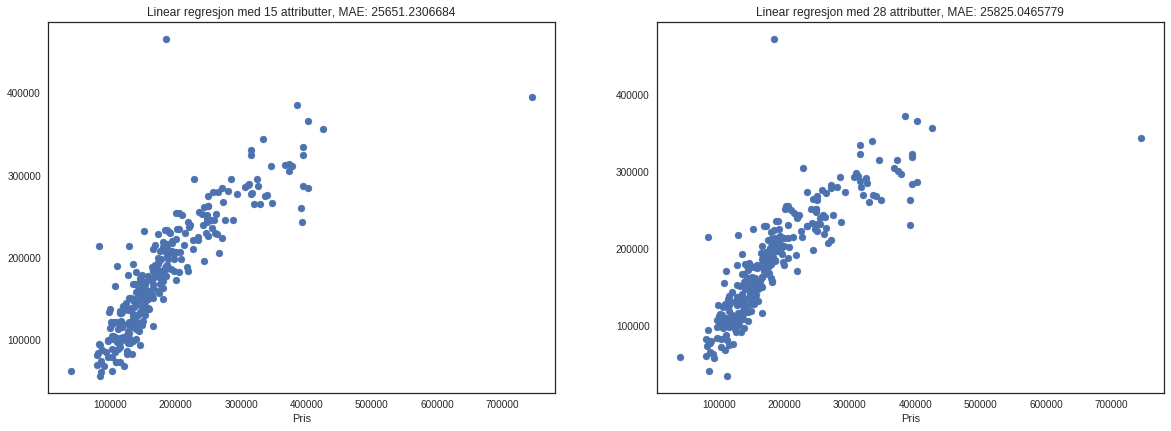

In [115]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
plt.scatter(output_testdata, pris_prediksjone_linr)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Linear regresjon med {} attributter, MAE: {}'.format(len(data_modell_desilled.columns),MAE_lin))

plt.subplot(2,2,2)
plt.scatter(output_testdata, pris_prediksjone_linr_full)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Linear regresjon med {} attributter, MAE: {}'.format(len(data_modell.columns),MAE_lin_full))